In [23]:
# debug 0704, step 1: test young
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of workforce    
for human in range(initial_workforce):
    person = Person(age=random.randint(15, 64), employed=bool(random.getrandbits(1)))
    workforce_coh.append(person)

#workforce = list(itertools.chain(unemp,emp))


for _ in range(math.ceil(100 * 0.011)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(newborn_coh, young_coh, workforce_coh, senior_coh))


    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]

# Simulation loop
random.seed(2)
n = simulation_years - 48
for year in range(n):
    
    young_this_year = 0
    workforce_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    print(len(pop))
    
    for person in pop:             
        #print(person.age)
        
        if person.is_young():
            young_this_year += 1
        
        if person.is_workforce():
            workforce_this_year += 1
                    
        if person.is_senior():
            senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    #print('newborn, young, workforce, senior at the beginning are: ', [newborn_this_year, young_this_year,workforce_this_year, senior_this_year])
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
        
    #print('count_0 at the end of the', year, 'th year: ', count_age(0, pop))
    
    print('young dependent at the end of the', year, 'th year: ', young_this_year)
    print('\n')

2 17
102
young dependent at the end of the 0 th year:  19


103
young dependent at the end of the 1 th year:  17




In [24]:
# debug 0705, step 2: test unemp
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))
    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]

# Simulation loop
random.seed(2)
n = simulation_years - 48
for year in range(n):
    
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    print(len(pop))
    
    for person in pop:             
        #print(person.age, person.employed)
        
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
        
    #print('count_0 at the end of the', year, 'th year: ', count_age(0, pop))
    
    print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    print('\n')

2 17
102
young dependent, emp, unemp, senior at the end of the 0 th year are:  [19, 67, 3, 13]


103
young dependent, emp, unemp, senior at the end of the 1 th year are:  [17, 63, 6, 14]




In [28]:
# debug 0705, step 3: test job finding rate
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))
    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]

# Simulation loop
random.seed(2)
n = simulation_years - 48
for year in range(n):
    
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    print('pop this year:', len(pop))
    
    for person in pop:             
        #print(person.age, person.employed)
        
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)    
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year
    
    print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    print('\n')

2 17
pop this year: 102
unemp to emp, emp to unemp: 2 4
young dependent, emp, unemp, senior at the end of the 0 th year are:  [19, 65, 5, 13]


pop this year: 103
unemp to emp, emp to unemp: 4 3
young dependent, emp, unemp, senior at the end of the 1 th year are:  [17, 64, 5, 14]




In [51]:
# debug 0705, step 3: test job finding rate
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return retirement_age <= self.age <= death_age

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))
    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):
    
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))
    
    for person in pop:             
        #print(person.age, person.employed)
        
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)    
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year
    
    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
    
print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])


2 17
young dependent, unemp, emp, retirees:  [[19, 19, 17, 18, 17, 17, 17, 16, 17, 16, 16, 16, 15, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 10, 12, 11, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23], [67, 65, 64, 64, 62, 61, 61, 61, 60, 58, 57, 58, 58, 57, 56, 55, 52, 53, 51, 48, 48, 46, 45, 45, 44, 44, 40, 40, 38, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 32, 33, 32, 33, 33, 32, 33, 32, 32], [13, 13, 14, 14, 15, 17, 18, 19, 19, 21, 22, 20, 21, 22, 23, 24, 27, 26, 24, 28, 26, 27, 27, 27, 27, 25, 28, 29, 32, 33, 31, 30, 27, 26, 25, 21, 21, 20, 20, 20, 20, 22, 18, 18, 14, 13, 14, 14, 14, 15]]


2 17
young dependent, unemp, emp, retirees:  [[19, 19, 17, 18, 17, 17, 17, 16, 17, 16, 16, 16, 15, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 10, 12, 11, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23], [67, 65, 64, 64, 62, 61, 61, 61, 60, 58, 57, 58, 58, 57, 56, 55, 52, 53, 51, 48, 48, 46, 45, 45, 44, 44, 40, 40, 38, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 32, 33, 32, 33, 33, 32, 33, 32, 32], [13, 10, 13, 13, 15, 16, 17, 18, 19, 21, 22, 22, 23, 23, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 40, 40, 43, 44, 47, 49, 49, 49, 50, 50, 50, 50, 51, 53, 53, 54, 55, 57, 57, 58, 58, 59, 60, 60, 60, 61]]


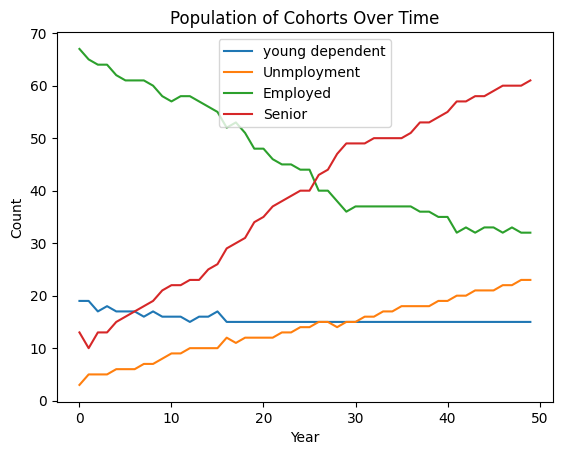

In [72]:
# debug 0705, step 4: test death rate replacing death age
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.23014 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))
    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):
    
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))
    
    for person in pop:             
        #print(person.age, person.employed)
        
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)    
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year
    
    death = math.ceil(senior_this_year * death_rate)  
    senior_this_year -= death
    
    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
    
print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])
years = list(range(simulation_years))
plt.plot(years, cohorts[0], label="young dependent")
plt.plot(years, cohorts[1], label="Unmployment")
plt.plot(years, cohorts[2], label="Employed")
plt.plot(years, cohorts[3], label="Senior")
plt.title("Population of Cohorts Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.savefig('aging vs workforce.png')
plt.show()

In [ ]:
'''
Assumption 1: only population 15 years and over reproduce 
Birth rate in US as of 2021: 11.0 per 1,000 population
Data source: https://www.cdc.gov/nchs/fastats/births.htm

Assumption 2: death only happens after retired. 
In 2021, life expectancy at birth was 76.4 years for the total U.S. population, 
Data source: https://www.cdc.gov/nchs/products/databriefs/db456.\
htm#:~:text=Rates%20increased%2012.1%25%20for%2045,over%20(15%2C210.9%20to%2015%2C743.3).\
&text=Statistically%20significant%20increase%20from%202020%20to%202021%20(p%20%3C%200.05).,-NOTES%3A%20Rates%20are

so the annual death rate x satisfies
x + 2(1-x)x + 3(1-x)**2*x + ... + 76(1-x)**75*x = 76.4

or based on data source from https://en.wikipedia.org/\
wiki/Mortality_rate#:~:text=Mortality%20rate%20is%20typically%20expressed,0.95%25%20out%20of%20the%20total.

As of 2020, the CIA estimates the U.S. crude death rate will be 8.3 per 1,000

As of 2006, the monthly job finding rate takes 0.563 
Data Source: https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr298.pdf

monthly job separation rate takes 0.47
* Data source: https://builtin.com/recruiting/employee-turnover-statistics#\
:~:text=1.,all%20turnover%20%E2%80%94%20voluntary%20and%20involuntary.

Assumption 3: all population aging from 15 to 64 are in labor force and 
participation_rate = count 15-64 / total population

death rate for 65 years and over: (2151.3+5119.4+15743.3)/100000=0.23014
As per CDC 2021
Deaths per 100,000 population:
65-74: 2,151.3
75-84: 5,119.4
85 and over: 15,743.3
Data source: https://www.cdc.gov/nchs/fastats/older-american-health.htm
'''

2 17
young dependent, unemp, emp, retirees:  [[19, 19, 17, 18, 17, 17, 17, 16, 17, 16, 16, 16, 15, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15], [3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 10, 12, 11, 12, 12, 12, 12, 13, 13, 14, 14, 15, 15, 14, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23], [67, 65, 64, 64, 62, 61, 61, 61, 60, 58, 57, 58, 58, 57, 56, 55, 52, 53, 51, 48, 48, 46, 45, 45, 44, 44, 40, 40, 38, 36, 37, 37, 37, 37, 37, 37, 37, 36, 36, 35, 35, 32, 33, 32, 33, 33, 32, 33, 32, 32], [13, 10, 13, 13, 15, 16, 17, 18, 19, 21, 22, 22, 23, 23, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 40, 40, 43, 44, 47, 49, 49, 49, 50, 50, 50, 50, 51, 53, 53, 54, 55, 57, 57, 58, 58, 59, 60, 60, 60, 61]]


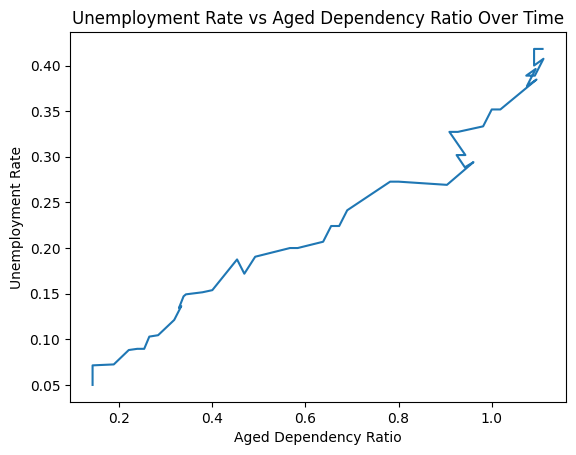

In [67]:
# debug 0705, step 5: test unemp rate
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

#death_rate = 0.01 
death_rate = 0.23014 
# assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []
unemp_rate_coh =[initial_unemployment_rate]
age_dep_ratio_coh = [initial_senior/initial_workforce]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))
    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):
    
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))
    
    for person in pop:             
        #print(person.age, person.employed)
        
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)    
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year
    
    death = math.ceil(senior_this_year * death_rate)  
    senior_this_year -= death
    
    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
    
    unemp_rate_coh.append(unemp_this_year/(unemp_this_year+emp_this_year))
    age_dep_ratio_coh.append(senior_this_year/(unemp_this_year+emp_this_year))
    
print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])
years = list(range(simulation_years))
plt.plot(age_dep_ratio_coh, unemp_rate_coh)
#plt.plot(years, age_dep_ratio_coh, label="Aged Dependency Ratio")

plt.title("Unemployment Rate vs Aged Dependency Ratio Over Time")
plt.xlabel("Aged Dependency Ratio")
plt.ylabel("Unemployment Rate")
#plt.legend()
plt.savefig('aging vs unemp.png')
plt.show()

In [56]:
# debug 0705, step 6: test unemp rate with goods market
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

#death_rate = 0.01 
death_rate = 0.23 # assume death only happens after retired with count_death = count_senior * death_rate
#death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed


# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 70
initial_senior = int(initial_population * initial_aging_rate) # 10
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 70*0.05=3

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []
unemp_rate_coh =[initial_unemployment_rate]
age_dep_ratio_coh = [initial_senior/initial_workforce]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh,emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))
    
def count_age(age, group):
    num = 0
    for person in group:
        if person.age == age:
            num += 1
            
    return num

coh = [newborn_coh, young_coh, workforce_coh, senior_coh]
print(len(newborn_coh), len(young_coh))

tran_age = [0, 14, 64, 80]
count_tran_age = [count_age(i,pop) for i in tran_age]
cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1,n):
    
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    #[print('count_{} at the beginning is: {}'.format(tran_age[i], count_age(0, pop))) for i in range(len(tran_age))]
    #print('count_14 at the ', year, 'th year: ', count_age(14, young_coh))
    #print('pop this year:', len(pop))
    
    for person in pop:             
        #print(person.age, person.employed)
        
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            
        person.update_age() 
        
    #print('newborn, young_this_year:', [newborn_this_year, young_this_year])

    #print('young dependent at the beginning of the', year, 'th year: ', young_this_year+newborn_this_year)  
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)    
    emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    #print('unemp to emp, emp to unemp:', unemp_new_emp_this_year, emp_new_unemp_this_year)
    emp_this_year += unemp_new_emp_this_year - emp_new_unemp_this_year
    unemp_this_year += emp_new_unemp_this_year - unemp_new_emp_this_year
    
    death = math.ceil(senior_this_year * death_rate)  
    senior_this_year -= death
    
    #print('young dependent, emp, unemp, senior at the end of the', year, 'th year are: ', [young_this_year,emp_this_year, unemp_this_year, senior_this_year])
    #print('\n')
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    #print('pop this year:', sum(cohorts[i][year] for i in range(len(cohorts))))
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
    
    unemp_rate_coh.append(unemp_this_year/(unemp_this_year+emp_this_year))
    age_dep_ratio_coh.append(senior_this_year/(unemp_this_year+emp_this_year))
    
print('young dependent, unemp, emp, retirees: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])



50

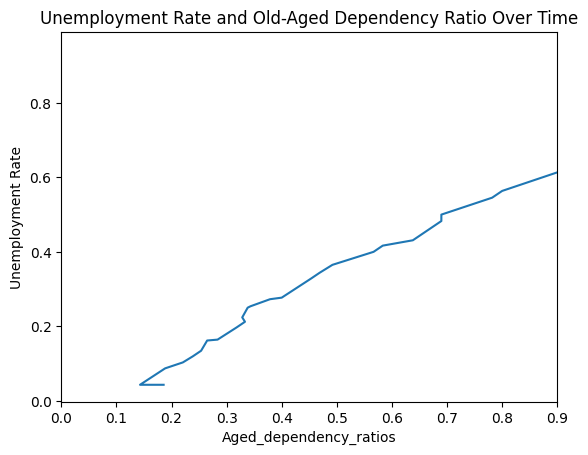

In [21]:
# 0730 
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, num_workers):
        hireorfire = self.price > self.vacancy_cost
        if hireorfire:
            self.job_vacancy -= num_workers
        else:
            self.job_vacancy += num_workers
        return [len([Person(age=random.randint(15, 64), employed=True)\
                     for _ in range(num_workers)]),\
               len([Person(age=random.randint(15, 64), employed=False)\
                     for _ in range(num_workers)])]
    
    def post_price(self, price):
        self.price = price

shopping_propensity_retirees = 0.5
shopping_propensity_unemployed = 0.7
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))
            
class LaborMarket:
    def __init__(self, firms, num_workers):
        self.num_workers = num_workers
        self.firms = firms

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.num_workers)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.num_workers)[1] for firm in self.firms)
        return [new_emp, new_unemp]
    

# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce)  # Pass initial_workforce here

# Simulation loop
random.seed(2)
n = simulation_years
for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
        
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)

    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    #unemp_new_emp_this_year = math.ceil(unemp_this_year * job_finding_rate)    
    #emp_new_unemp_this_year = math.ceil(emp_this_year * job_separation_rate)
    
    emp_new_hireorfire_this_year = labor_market.new_workstatus()[0]
    unemp_new_hireorfire_this_year = labor_market.new_workstatus()[1]
      
    emp_this_year += emp_new_hireorfire_this_year - unemp_new_hireorfire_this_year
    unemp_this_year += unemp_new_hireorfire_this_year - emp_new_hireorfire_this_year
    
    death = math.ceil(senior_this_year * death_rate)  
    senior_this_year -= death

    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts))) 
    
# Calculate the unemployment rate and old-aged dependency ratio over time
unemployment_rates = [cohorts[1][year] / (cohorts[1][year] + cohorts[2][year]) for year in range(n)]
old_aged_dependency_ratios = [cohorts[3][year] / (cohorts[1][year] + cohorts[2][year]) for year in range(n)]

# Plot results
#years = list(range(simulation_years))
plt.plot(old_aged_dependency_ratios, unemployment_rates, label="Unemployment Rate")
#plt.plot(years, , label="Old-Aged Dependency Ratio")
plt.title("Unemployment Rate and Old-Aged Dependency Ratio Over Time")
plt.xlabel("Aged_dependency_ratios")
plt.ylabel("Unemployment Rate")
plt.xlim([0, 0.9])
#plt.legend()
plt.show()



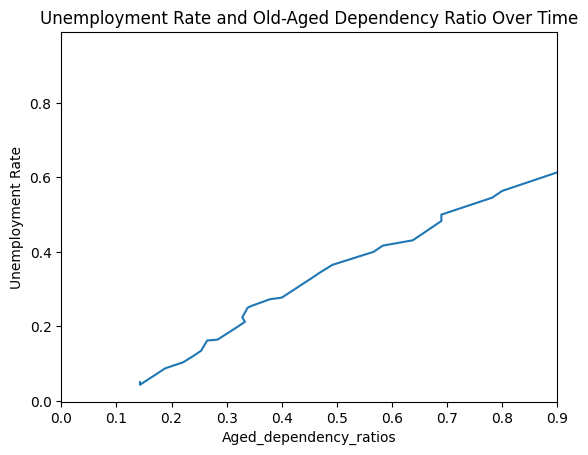

In [25]:
# 0802 
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 100
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, num_workers):
        hireorfire = self.price > self.vacancy_cost
        if hireorfire:
            self.job_vacancy -= num_workers
        else:
            self.job_vacancy += num_workers
        return [len([Person(age=random.randint(15, 64), employed=True)\
                     for _ in range(num_workers)]),\
               len([Person(age=random.randint(15, 64), employed=False)\
                     for _ in range(num_workers)])]
    
    def post_price(self, price):
        self.price = price

shopping_propensity_retirees = 0.5
shopping_propensity_unemployed = 0.7
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))
            
class LaborMarket:
    def __init__(self, firms, num_workers):
        self.num_workers = num_workers
        self.firms = firms

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.num_workers)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.num_workers)[1] for firm in self.firms)
        return [new_emp, new_unemp]
    

# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce)  # Pass initial_workforce here

# Simulation loop

random.seed(2)
n = simulation_years
unemployment_rates = [initial_unemployment_rate]  # Store unemployment rates over time
old_aged_dependency_ratios = [initial_senior / initial_workforce]

for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
    
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)
 
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)
    
    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()

    # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year

    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
    
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)

    
# Plot results
#years = list(range(simulation_years))
plt.plot(old_aged_dependency_ratios, unemployment_rates, label="Unemployment Rate")
#plt.plot(years, , label="Old-Aged Dependency Ratio")
plt.title("Unemployment Rate and Old-Aged Dependency Ratio Over Time")
plt.xlabel("Aged_dependency_ratios")
plt.ylabel("Unemployment Rate")
#plt.xlim([0, 0.9])
#plt.legend()
plt.show()



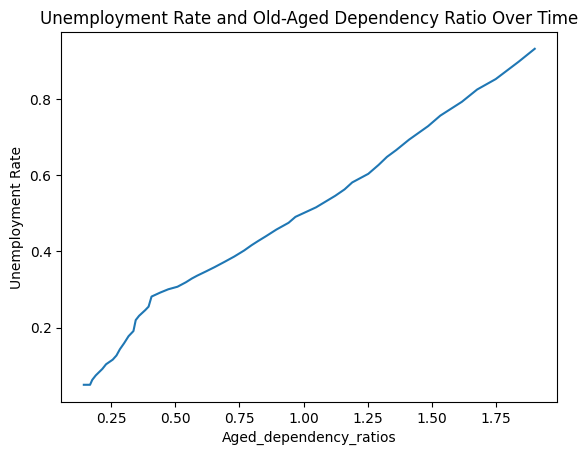

In [27]:
# 0802 
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, num_workers):
        hireorfire = self.price > self.vacancy_cost
        if hireorfire:
            self.job_vacancy -= num_workers
        else:
            self.job_vacancy += num_workers
        return [len([Person(age=random.randint(15, 64), employed=True)\
                     for _ in range(num_workers)]),\
               len([Person(age=random.randint(15, 64), employed=False)\
                     for _ in range(num_workers)])]
    
    def post_price(self, price):
        self.price = price

shopping_propensity_retirees = 0.5
shopping_propensity_unemployed = 0.7
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))
            
class LaborMarket:
    def __init__(self, firms, num_workers):
        self.num_workers = num_workers
        self.firms = firms

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.num_workers)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.num_workers)[1] for firm in self.firms)
        return [new_emp, new_unemp]
    

# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce)  # Pass initial_workforce here

# Simulation loop

random.seed(2)
n = simulation_years
unemployment_rates = [initial_unemployment_rate]  # Store unemployment rates over time
old_aged_dependency_ratios = [initial_senior / initial_workforce]


for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
    
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)
        
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)


    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()

    # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year

    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
   
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)

    
# Plot results
#years = list(range(simulation_years))
plt.plot(old_aged_dependency_ratios, unemployment_rates, label="Unemployment Rate")
#plt.plot(years, , label="Old-Aged Dependency Ratio")
plt.title("Unemployment Rate and Old-Aged Dependency Ratio Over Time")
plt.xlabel("Aged_dependency_ratios")
plt.ylabel("Unemployment Rate")
#plt.xlim([0, 0.9])
#plt.legend()
plt.show()



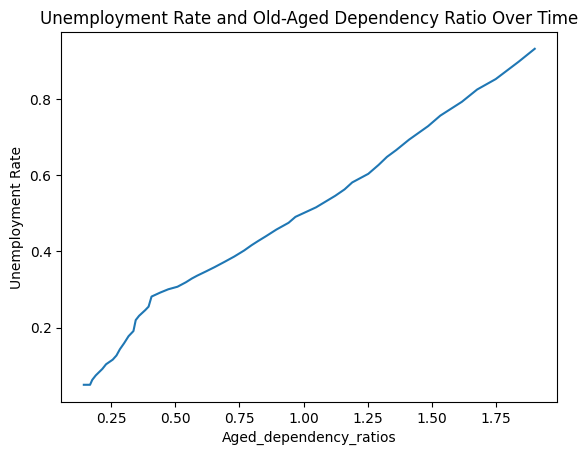

In [28]:
# 0802 shopping propensities for retirees, unemployed and employed = 0.1, 0.6, 0.9
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.047

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, num_workers):
        hireorfire = self.price > self.vacancy_cost
        if hireorfire:
            self.job_vacancy -= num_workers
        else:
            self.job_vacancy += num_workers
        return [len([Person(age=random.randint(15, 64), employed=True)\
                     for _ in range(num_workers)]),\
               len([Person(age=random.randint(15, 64), employed=False)\
                     for _ in range(num_workers)])]
    
    def post_price(self, price):
        self.price = price

shopping_propensity_retirees = 0.1
shopping_propensity_unemployed = 0.6
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))
            
class LaborMarket:
    def __init__(self, firms, num_workers):
        self.num_workers = num_workers
        self.firms = firms

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.num_workers)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.num_workers)[1] for firm in self.firms)
        return [new_emp, new_unemp]
    

# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce)  # Pass initial_workforce here

# Simulation loop

random.seed(2)
n = simulation_years
unemployment_rates = [initial_unemployment_rate]  # Store unemployment rates over time
old_aged_dependency_ratios = [initial_senior / initial_workforce]


for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
    
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)
        
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)


    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()

    # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year

    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
   
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)

    
# Plot results
#years = list(range(simulation_years))
plt.plot(old_aged_dependency_ratios, unemployment_rates, label="Unemployment Rate")
#plt.plot(years, , label="Old-Aged Dependency Ratio")
plt.title("Unemployment Rate and Old-Aged Dependency Ratio Over Time")
plt.xlabel("Aged_dependency_ratios")
plt.ylabel("Unemployment Rate")
#plt.xlim([0, 0.9])
#plt.legend()
plt.show()



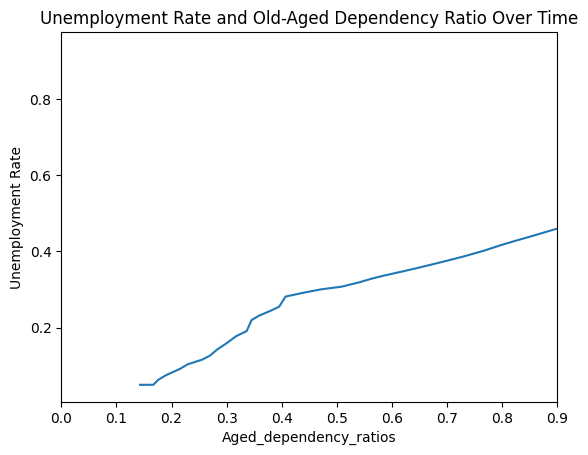

In [1]:
# 0802 shopping propensities for retirees, unemployed and employed = 0.1, 0.6, 0.9
# shopping_propensity_unemployed = 0.2, job_finding_rate = 0.3, job_separation_rate = 0.01
# shopping_propensity_unemployed = 0.1, job_finding_rate = 0.2, job_separation_rate = 0.01
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.2
job_separation_rate = 0.01

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, num_workers):
        hireorfire = self.price > self.vacancy_cost
        if hireorfire:
            self.job_vacancy -= num_workers
        else:
            self.job_vacancy += num_workers
        return [len([Person(age=random.randint(15, 64), employed=True)\
                     for _ in range(num_workers)]),\
               len([Person(age=random.randint(15, 64), employed=False)\
                     for _ in range(num_workers)])]
    
    def post_price(self, price):
        self.price = price

shopping_propensity_retirees = 0.1
shopping_propensity_unemployed = 0.1
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))
            
class LaborMarket:
    def __init__(self, firms, num_workers):
        self.num_workers = num_workers
        self.firms = firms

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.num_workers)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.num_workers)[1] for firm in self.firms)
        return [new_emp, new_unemp]
    

# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce)  # Pass initial_workforce here

# Simulation loop

random.seed(2)
n = simulation_years
unemployment_rates = [initial_unemployment_rate]  # Store unemployment rates over time
old_aged_dependency_ratios = [initial_senior / initial_workforce]


for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
    
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)
        
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)


    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()

    # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year

    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
   
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)

    
# Plot results
#years = list(range(simulation_years))
plt.plot(old_aged_dependency_ratios, unemployment_rates, label="Unemployment Rate")
#plt.plot(years, , label="Old-Aged Dependency Ratio")
plt.title("Unemployment Rate and Old-Aged Dependency Ratio Over Time")
plt.xlabel("Aged_dependency_ratios")
plt.ylabel("Unemployment Rate")
plt.xlim([0, 0.9])
#plt.legend()
plt.show()



In [27]:
# 0803 incorporate labor and goods market and compare results between theoretic model and abm
# 0802 shopping propensities for retirees, unemployed and employed = 0.1, 0.6, 0.9
# shopping_propensity_unemployed = 0.2, job_finding_rate = 0.3, job_separation_rate = 0.01
# shopping_propensity_unemployed = 0.1, job_finding_rate = 0.2, job_separation_rate = 0.01
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.2
job_separation_rate = 0.01

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

import random

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, labor_market):
        hire_or_fire_decision = self.price > self.vacancy_cost

        if hire_or_fire_decision:  # Hiring decision
            num_unemployed = len([p for p in labor_market.workforce if p.is_unemployed()])
            num_hired = min(num_unemployed, int(num_unemployed * labor_market.job_finding_rate))
            self.job_vacancy += num_hired
            return num_hired, 0, self.job_vacancy

        else:  # Firing decision
            num_employed = len([p for p in labor_market.workforce if p.is_employed()])
            num_fired = min(num_employed, int(num_employed * labor_market.job_separation_rate))
            self.job_vacancy -= num_fired
            return 0, num_fired, self.job_vacancy

    def post_price(self, price):
        self.price = price

        # Open new job vacancies based on price and vacancy cost difference
        num_new_vacancies = int((price - self.vacancy_cost) * 10)
        self.job_vacancy += num_new_vacancies
        return self.job_vacancy

shopping_propensity_retirees = 0.1
shopping_propensity_unemployed = 0.1
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))

class LaborMarket:
    def __init__(self, firms, num_workers, initial_unemployment_rate):
        self.firms = firms
        self.num_workers = num_workers
        self.initial_unemployment_rate = initial_unemployment_rate
        self.workforce = [Person(age=random.randint(15, 64), employed=True) for _ in range(num_workers)]
        self.initial_unemployed = int(num_workers * initial_unemployment_rate)

        for _ in range(self.initial_unemployed):
            self.workforce.append(Person(age=random.randint(15, 64), employed=False))

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.workforce)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.workforce)[1] for firm in self.firms)
        return [new_emp, new_unemp]

    def total_job_vacancies(self):
        return sum(firm.job_vacancy for firm in self.firms)



# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce, initial_unemployment_rate)  # Pass initial_workforce here

# Simulation loop

random.seed(2)
n = simulation_years
unemployment_rates = [initial_unemployment_rate]  # Store unemployment rates over time
old_aged_dependency_ratios = [initial_senior / initial_workforce]
job_vacancy = labor_market.total_job_vacancies()
market_tightness = [job_vacancy / initial_unemployment_rate]




for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
    
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)
        
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)


    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()
    job_vacancy_this_year = labor_market.total_job_vacancies()
    
    # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year
    
    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
   
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)
    
    market_tightness_this_year = job_vacancy_this_year / unemp_this_year
    market_tightness.append(market_tightness_this_year)
    
# Plot results
#years = list(range(simulation_years))
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(old_aged_dependency_ratios, unemployment_rates)
axs[0, 0].set_title('unemployment rate')
axs[0, 1].plot(old_aged_dependency_ratios, market_tightness, 'tab:orange')
axs[0, 1].set_title('theta')
#axs[1, 0].plot(aging, profit, 'tab:green')
#axs[1, 0].set_title('Profit')
#axs[1, 1].plot(aging, price, 'tab:red')
#axs[1, 1].set_title('price')

#plt.legend()
fig.tight_layout(pad=2.0)
plt.show()



AttributeError: 'list' object has no attribute 'workforce'

In [23]:



for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0

    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
    
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)
        
    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)    
    
    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)


    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()
    job_vacancy_this_year = labor_market.total_job_vacancies()
    
    # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year
    
    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
   
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)
    
    market_tightness_this_year = job_vacancy_this_year / unemp_this_year
    market_tightness.append(market_tightness_this_year)
    
# Plot results
#years = list(range(simulation_years))
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(old_aged_dependency_ratios, unemployment_rates)
axs[0, 0].set_title('unemployment rate')
axs[0, 1].plot(old_aged_dependency_ratios, market_tightness, 'tab:orange')
axs[0, 1].set_title('theta')
#axs[1, 0].plot(aging, profit, 'tab:green')
#axs[1, 0].set_title('Profit')
#axs[1, 1].plot(aging, price, 'tab:red')
#axs[1, 1].set_title('price')

#plt.legend()
fig.tight_layout(pad=2.0)
plt.show()



AttributeError: 'int' object has no attribute 'workforce'

In [ ]:
import random
import math
import itertools
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011
death_rate = 0.23014
death_age = 80
retirement_age = 65

initial_participation_rate = 0.7
initial_aging_rate = 0.1
initial_unemployment_rate = 0.05

job_finding_rate = 0.2
job_separation_rate = 0.01

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_workforce(self):
        return 14 < self.age < retirement_age
    
    def is_senior(self):
        return self.age >= retirement_age 

    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

class Firm:
    def __init__(self, price, vacancy, vacancy_cost):
        self.price = price
        self.job_vacancy = vacancy
        self.vacancy_cost = vacancy_cost

    def hire_or_fire(self, num_workers):
        hireorfire = self.price > self.vacancy_cost
        if hireorfire:
            self.job_vacancy -= num_workers
        else:
            self.job_vacancy += num_workers
        return [len([Person(age=random.randint(15, 64), employed=True) for _ in range(num_workers)]),
                len([Person(age=random.randint(15, 64), employed=False) for _ in range(num_workers)])]

    def post_price(self, price):
        self.price = price

shopping_propensity_retirees = 0.1
shopping_propensity_unemployed = 0.1
shopping_propensity_employed = 0.9

class GoodsMarket:
    def __init__(self, firms):
        self.firms = firms

    def calculate_demand(self, consumers):
        total_demand = 0
        for consumer in consumers:
            if consumer.is_senior():
                total_demand += shopping_propensity_retirees
            elif consumer.is_employed():
                total_demand += shopping_propensity_employed
            elif consumer.is_unemployed():
                total_demand += shopping_propensity_unemployed
        return round(total_demand)

    def update_prices(self, total_demand):
        average_price = sum(firm.price for firm in self.firms) / len(self.firms)
        for firm in self.firms:
            firm.post_price(firm.price * (firm.price / average_price) * (1 + total_demand / len(self.firms)))
            
class LaborMarket:
    def __init__(self, firms, num_workers):
        self.num_workers = num_workers
        self.firms = firms

    def new_workstatus(self):
        goods_market = GoodsMarket(self.firms) 
        new_emp = sum(firm.hire_or_fire(self.num_workers)[0] for firm in self.firms)
        new_unemp = sum(firm.hire_or_fire(self.num_workers)[1] for firm in self.firms)
        return [new_emp, new_unemp]
    

# Parameters for firm-related variables
initial_price = 0.7
initial_vacancy = 3
initial_vacancy_cost = 0.6

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(initial_price, initial_vacancy, initial_vacancy_cost) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize workforce data
initial_workforce = int(initial_population * initial_participation_rate)
initial_senior = int(initial_population * initial_aging_rate)
initial_unemp = int(initial_workforce * initial_unemployment_rate)

# Initialize population
pop_coh = []
newborn_coh = []
senior_coh = []
young_coh = []
workforce_coh = []
emp_coh = []
unemp_coh = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])), employed=False)
    senior_coh.append(person) if person.age >= 65 else young_coh.append(person)

for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp_coh.append(person)

for _ in range(initial_workforce - initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp_coh.append(person)

workforce_coh = list(itertools.chain(unemp_coh, emp_coh))

for _ in range(math.ceil(initial_population * birth_rate)):
    person = Person(age=0, employed=False)
    newborn_coh.append(person)

young_depen = list(itertools.chain(newborn_coh, young_coh))
pop = list(itertools.chain(young_depen, workforce_coh, senior_coh))

cohorts = [[len(young_depen)], [len(unemp_coh)], [len(emp_coh)], [len(senior_coh)]]

# Initialize the goods market with firms
num_firms = 10
firms = [Firm(random.uniform(0.5, 1), random.randint(1, 5), random.uniform(0.5, 1)) for _ in range(num_firms)]
goods_market = GoodsMarket(firms)
price_history = []

# Initialize the LaborMarket with firms and initial_workforce
labor_market = LaborMarket(firms, initial_workforce)  # Pass initial_workforce here

# Simulation loop

random.seed(2)
n = simulation_years
unemployment_rates = [initial_unemployment_rate]  # Store unemployment rates over time
old_aged_dependency_ratios = [initial_senior / initial_workforce]
job_vacancies = [initial_vacancy]
firm_profits = [0]
costs_to_open_vacancy = [0]
prices_in_goods_market = [0]

for year in range(1, n):
    young_this_year = 0
    workforce_this_year = 0
    unemp_this_year = 0
    emp_this_year = 0
    senior_this_year = 0
    newborn_this_year = 0
    for person in pop:             
        if person.is_young():
            young_this_year += 1
            
        if person.is_workforce():
            if person.is_unemployed():
                unemp_this_year += 1
            
            if person.is_employed():
                emp_this_year += 1
                    
        if person.is_senior():
                senior_this_year += 1
            

        person.update_age()
        
    # Goods market dynamics
    total_demand = goods_market.calculate_demand(pop)
    goods_market.update_prices(total_demand)

    newborn_this_year = math.ceil((senior_this_year + workforce_this_year) * birth_rate)

    for _ in range(newborn_this_year):
        person = Person(age=0, employed=False)
        pop.append(person)



    # Calculate the number of workers who found jobs and those who became unemployed this year
    emp_new_hire_this_year, unemp_new_hire_this_year = labor_market.new_workstatus()

   # Calculate the updated numbers of employed and unemployed workers for this year
    emp_this_year += emp_new_hire_this_year - unemp_new_hire_this_year
    unemp_this_year += unemp_new_hire_this_year - emp_new_hire_this_year

    # Update the number of senior citizens considering the death rate
    death = math.ceil(senior_this_year * death_rate)
    senior_this_year -= death
    
    # Store the values in cohorts list
    my_list = [young_this_year, unemp_this_year, emp_this_year, senior_this_year]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

    # Calculate the updated total population
    tot_pop = sum(cohorts[i][year] for i in range(len(cohorts)))
   
    # Calculate the updated unemployment rate for this year and append it to the list
    updated_unemployment_rate = unemp_this_year / (unemp_this_year + emp_this_year)
    unemployment_rates.append(updated_unemployment_rate)

    # Calculate the updated aged dependency rate for this year and append it to the list
    updated_old_aged_dependency_ratios = senior_this_year / (unemp_this_year + emp_this_year)
    old_aged_dependency_ratios.append(updated_old_aged_dependency_ratios)


    # Calculate firm-related variables
    num_job_vacancies = sum(firm.job_vacancy for firm in firms)
    job_vacancies.append(num_job_vacancies)

    total_firm_profits = sum((firm.price - firm.vacancy_cost)* firm.job_vacancy for firm in firms)
    firm_profits.append(total_firm_profits)

    total_costs_to_open_vacancy = sum(firm.vacancy_cost * firm.job_vacancy for firm in firms)
    costs_to_open_vacancy.append(total_costs_to_open_vacancy)

    total_prices_in_goods_market = sum(firm.price for firm in firms) / len(firms)
    prices_in_goods_market.append(total_prices_in_goods_market)


# Plot results
fig, axs = plt.subplots(2,2)
axs[0,0].plot(old_aged_dependency_ratios, unemployment_rates, label="Unemployment Rate")
axs[0, 0].set_title('unemployment rate')
axs[0,1].plot(old_aged_dependency_ratios, job_vacancies/uneployment, label="Number of Job Vacancies")
axs[0, 1].set_title('theta')
axs[1,0].plot(old_aged_dependency_ratios, firm_profits, label="Firm Profits")
axs[1, 0].set_title('Profit')
axs[1,1].plot(old_aged_dependency_ratios, prices_in_goods_market, label="Prices in Goods Market")
axs[1, 1].set_title('price')
fig.tight_layout(pad=2.0)
plt.show()
